In [132]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cosine
from gensim.models import Word2Vec as w2v

model=w2v.load("Modelo2(pucio)\w2v_model.model")
def vectorizar(oracion):
    vector_palabras=[model.wv[palabra] for palabra in oracion if palabra in model.wv]
    if vector_palabras:  # Asegurar que la oración tenga al menos una palabra en el modelo
        representacion_oracion = np.mean(vector_palabras, axis=0)
        return representacion_oracion
    else:
        return np.zeros(100)
    
def dist_cos(vectors):
    vector_1, vector_2 = vectors
    return cosine(vector_1, vector_2)

<>:6: SyntaxWarning: invalid escape sequence '\w'
<>:6: SyntaxWarning: invalid escape sequence '\w'
C:\Users\gonza\AppData\Local\Temp\ipykernel_11168\1813889185.py:6: SyntaxWarning: invalid escape sequence '\w'
  model=w2v.load("Modelo2(pucio)\w2v_model.model")


## Arreglamos pares de noticias (verdaderos)

In [133]:
df=pd.read_csv("pares.csv")

In [134]:
df_modelo_det=df[['noticia_link_1','noticia_cuerpo_1','noticia_link_2','noticia_cuerpo_2']]
df_modelo_det['label']=True
df_modelo_det.head()

C:\Users\gonza\AppData\Local\Temp\ipykernel_11168\1548254662.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modelo_det['label']=True


,noticia_link_1,noticia_cuerpo_1,noticia_link_2,noticia_cuerpo_2,label
0,https://peru21.pe/deportes/futbol-peruano/univ...,apenas expulsaron arquimides figuera minutos n...,https://elcomercio.pe/deporte-total/universita...,nicolas cordoba vio situacion impensada result...,True
1,https://peru21.pe/deportes/futbol-peruano/univ...,minutos final universitario deportes quedo die...,https://elcomercio.pe/deporte-total/universita...,universitario obtenia gran resultado arequipa ...,True
2,https://peru21.pe/deportes/futbol-peruano/melg...,delantero argentino german denis debuto sabado...,https://elcomercio.pe/deporte-total/futbol-per...,delantero argentino german denis debuto sabado...,True
3,https://peru21.pe/deportes/universitario-depor...,actualizacionuniversitario deportes dejo volte...,https://elcomercio.pe/deporte-total/universita...,universitario deportes cayo visita fbc melgar ...,True
4,https://peru21.pe/mundo/medio-oriente/siria-ru...,aviones rusos bombardearon posiciones rebeldes...,https://peru21.pe/mundo/medio-oriente/rusia-in...,aviacion rusa lanzo hoy alrededor ataques aere...,True


In [135]:
df_modelo_det['vector_1']=df_modelo_det['noticia_cuerpo_1'].apply(vectorizar)
df_modelo_det['vector_2']=df_modelo_det['noticia_cuerpo_2'].apply(vectorizar)

C:\Users\gonza\AppData\Local\Temp\ipykernel_11168\2086623094.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modelo_det['vector_1']=df_modelo_det['noticia_cuerpo_1'].apply(vectorizar)
C:\Users\gonza\AppData\Local\Temp\ipykernel_11168\2086623094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modelo_det['vector_2']=df_modelo_det['noticia_cuerpo_2'].apply(vectorizar)


In [136]:
df_modelo_det.head()

,noticia_link_1,noticia_cuerpo_1,noticia_link_2,noticia_cuerpo_2,label,vector_1,vector_2
0,https://peru21.pe/deportes/futbol-peruano/univ...,apenas expulsaron arquimides figuera minutos n...,https://elcomercio.pe/deporte-total/universita...,nicolas cordoba vio situacion impensada result...,True,"[-0.006305588, 0.35444927, 0.24323046, 0.19483...","[-0.007704876, 0.36249253, 0.2449795, 0.196204..."
1,https://peru21.pe/deportes/futbol-peruano/univ...,minutos final universitario deportes quedo die...,https://elcomercio.pe/deporte-total/universita...,universitario obtenia gran resultado arequipa ...,True,"[0.0070322617, 0.3425468, 0.24852908, 0.199710...","[0.0071319356, 0.33965188, 0.2517617, 0.198077..."
2,https://peru21.pe/deportes/futbol-peruano/melg...,delantero argentino german denis debuto sabado...,https://elcomercio.pe/deporte-total/futbol-per...,delantero argentino german denis debuto sabado...,True,"[-0.017571079, 0.34671143, 0.24663553, 0.21241...","[-0.015323356, 0.3460758, 0.24498166, 0.212715..."
3,https://peru21.pe/deportes/universitario-depor...,actualizacionuniversitario deportes dejo volte...,https://elcomercio.pe/deporte-total/universita...,universitario deportes cayo visita fbc melgar ...,True,"[-0.0052936445, 0.3518288, 0.25134522, 0.20457...","[-0.004430492, 0.35209692, 0.26166666, 0.20485..."
4,https://peru21.pe/mundo/medio-oriente/siria-ru...,aviones rusos bombardearon posiciones rebeldes...,https://peru21.pe/mundo/medio-oriente/rusia-in...,aviacion rusa lanzo hoy alrededor ataques aere...,True,"[0.0005676896, 0.32807365, 0.24815297, 0.20244...","[-0.011992177, 0.341866, 0.25247806, 0.2045655..."


In [137]:
df_modelo_truers=pd.DataFrame()
df_modelo_truers['vector'] = df_modelo_det.apply(lambda row: np.concatenate((row['vector_1'], row['vector_2'])), axis=1)
df_modelo_truers['distance'] = df_modelo_det.apply(lambda row: dist_cos((row['vector_1'], row['vector_2'])), axis=1)
df_modelo_truers['label']=True
df_modelo_truers.head()

c:\Users\gonza\OneDrive - Universidad del Pacífico\Material\Ciclo VIII\Analitica de la web\Proy-Ana\ProyAna\Lib\site-packages\scipy\spatial\distance.py:647: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


,vector,distance,label
0,"[-0.006305588, 0.35444927, 0.24323046, 0.19483...",0.000163,True
1,"[0.0070322617, 0.3425468, 0.24852908, 0.199710...",0.000080,True
2,"[-0.017571079, 0.34671143, 0.24663553, 0.21241...",0.000013,True
3,"[-0.0052936445, 0.3518288, 0.25134522, 0.20457...",0.000180,True
4,"[0.0005676896, 0.32807365, 0.24815297, 0.20244...",0.000743,True


## Arreglamos pares de noticias (falsos)

In [138]:
comercio = pd.read_csv("../Contenido/comercio_df1.txt")
correo = pd.read_csv("../Contenido/correo_df1.txt")
p21 = pd.read_csv("../Contenido/peru21_df1.txt")
gen=pd.concat([comercio,correo,p21],axis=0)
gen.shape

(216577, 7)

In [139]:
##periodo de tiempo
inicio='2018-02-01'
fin='2018-02-15'
df1=gen[(gen['dia']<=fin)&(gen['dia']>=inicio)]
df1.head()

,link,headline,bajada,antetitulo,cuerpo,dia,etiquetas
39389,https://elcomercio.pe/mundial/peru-jugara-suec...,peru jugara suecia semana mundial rusia,seleccion peruana confirmo jugara amistoso sue...,Mundial,fpf concreto amistoso mas peru cara mundial ru...,2018-02-01,"Rusia 2018, Selección peruana"
39390,https://elcomercio.pe/peru/paro-agrario-panora...,paro agrario panorama regiones protestan,comuneros deandaymarca huancavelica amenazaron...,Perú,tras dos muertes dejaron ayer enfrentamientos ...,2018-02-01,"paro agrario, Junín, Huancavelica"
39391,https://elcomercio.pe/mundo/actualidad/youtube...,youtuber logan paul ironicamente dicen suicide,bloguero estadounidense recordado polemico vid...,Actualidad,vez mas polemico youtuber logan paul pronuncia...,2018-02-01,"Logan Paul, YouTube"
39392,https://elcomercio.pe/tecnologia/ciencias/rusi...,fenomeno hizo subieran grados siberia,fenomeno precedentes hizo temperatura siberia ...,NaN,hace unas semanas informabamos bbc mundo vida ...,2018-02-01,"Rusia, Ciencias, BBC"
39393,https://elcomercio.pe/tvmas/series/dragon-ball...,dragon ball super revela sinopsis episodio,revista especializada comparte informacion enc...,Series,acera final dragon ball super torneo poder tod...,2018-02-01,"Dragon Ball, Dragon Ball Super"


In [140]:
df_false=df1[['link','cuerpo']]

In [141]:
df_false.shape

(4932, 2)

In [142]:
inicio='2017-02-01'
fin='2017-02-15'
df1=gen[(gen['dia']<=fin)&(gen['dia']>=inicio)]
df1.head()

,link,headline,bajada,antetitulo,cuerpo,dia,etiquetas
2995,https://elcomercio.pe/politica/congreso/grupo-...,grupo congreso aprueba segundo paquete decretos,subgrupo comision constitucion aprobo informes...,Congreso,grupo comision constitucion congreso viene rev...,2017-02-01,Facultades legislativas
2996,https://elcomercio.pe/politica/congreso/grupo-...,grupo congreso aprueba segundo paquete decretos,subgrupo comisi oacute n constituci oacute n a...,Política,grupo comisin constitucin congreso viene revis...,2017-02-01,Facultades legislativas
2997,https://elcomercio.pe/lima/nueva-crecida-rio-h...,nueva crecida rio huaycoloro causo alarma vecinos,entrada campoy cerrada policia pidieron reside...,Lima,nueva crecida rio huaycoloro causo alarma veci...,2017-02-01,Río Huaycoloro
2998,https://elcomercio.pe/mundo/eeuu/musulmanes-pr...,musulmanes protestaron donald trump frente cap...,protesta encabezada khizr khan perdio hijo gue...,EEUU,khizr khan musulman perdio hijo guerra irak pa...,2017-02-01,"Estados Unidos, Donald Trump"
2999,https://elcomercio.pe/lima/minsa-lima-callao-h...,minsa lima callao mil niños anemia,pais niños menores años padecen anemia,Lima,ministerio salud advirtio lima metropolitana c...,2017-02-01,"Anemia, Ministerio de Salud"


In [143]:
df_false1=df1[['link','cuerpo']]

In [144]:
df_false1 = df_false1.rename(columns={'link': 'noticia_link_2', 'cuerpo': 'noticia_cuerpo_2'})
df_false1.reset_index(inplace=True)
df_false1.drop('index',axis=1,inplace=True)
df_false1.shape

(3746, 2)

In [145]:
df_false = df_false.rename(columns={'link': 'noticia_link_1', 'cuerpo': 'noticia_cuerpo_1'})
df_false.reset_index(inplace=True)
df_false.drop('index',axis=1,inplace=True)
df_false=df_false[:3746]

In [146]:
df_false=pd.concat([df_false,df_false1],axis=1)
df_false.dropna(inplace=True)

In [147]:
df_false.shape

(3733, 4)

In [148]:
df_false['vector_1']=df_false['noticia_cuerpo_1'].apply(vectorizar)
df_false['vector_2']=df_false['noticia_cuerpo_2'].apply(vectorizar)

In [149]:
df_modelo_fake=pd.DataFrame()
df_modelo_fake['vector'] = df_false.apply(lambda row: np.concatenate((row['vector_1'], row['vector_2'])), axis=1)
df_modelo_fake['distance'] = df_false.apply(lambda row: dist_cos((row['vector_1'], row['vector_2'])), axis=1)
df_modelo_fake['label']=False
df_modelo_fake.head()

,vector,distance,label
0,"[0.005788051, 0.3538172, 0.22474027, 0.1879493...",0.003728,False
1,"[0.011197299, 0.35002586, 0.24573912, 0.198400...",0.002024,False
2,"[0.006412245, 0.3427508, 0.23235036, 0.2021277...",0.001323,False
3,"[0.007059036, 0.36455196, 0.2465361, 0.2023148...",0.001345,False
4,"[-0.002157294, 0.34797102, 0.253392, 0.1905025...",0.002584,False


In [150]:
df_modelo_fake.shape

(3733, 3)

## DF completo

In [151]:
df_modelo_completo=pd.concat([df_modelo_truers,df_modelo_fake[:df_modelo_truers.shape[0]]],axis=0)

In [152]:
df_modelo_completo

,vector,distance,label
0,"[-0.006305588, 0.35444927, 0.24323046, 0.19483...",0.000163,True
1,"[0.0070322617, 0.3425468, 0.24852908, 0.199710...",0.000080,True
2,"[-0.017571079, 0.34671143, 0.24663553, 0.21241...",0.000013,True
3,"[-0.0052936445, 0.3518288, 0.25134522, 0.20457...",0.000180,True
4,"[0.0005676896, 0.32807365, 0.24815297, 0.20244...",0.000743,True
...,...,...,...
483,"[-0.005910433, 0.35506958, 0.26153556, 0.19909...",0.000789,False
484,"[-0.0025814928, 0.36323622, 0.23859063, 0.1947...",0.000880,False
485,"[-0.032635316, 0.35215017, 0.2712324, 0.214927...",0.002055,False
486,"[0.021032246, 0.3391009, 0.247589, 0.19070993,...",0.001458,False


In [153]:
df_truers = df_modelo_completo[df_modelo_completo['label'] == True]
df_fakes = df_modelo_completo[df_modelo_completo['label'] == False]

df_train_truers = df_truers.sample(frac=0.8, random_state=42)
df_train_fakes = df_fakes.sample(frac=0.8, random_state=42)

df_train = pd.concat([df_train_truers, df_train_fakes])

df_test = df_modelo_completo.drop(df_train.index)

## Modelo (MLP)

In [154]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_vectors = np.vstack(df_train['vector'])
X_test_vectors = np.vstack(df_test['vector'])

X_train_distance = np.array(df_train['distance']).reshape(-1, 1)
X_test_distance = np.array(df_test['distance']).reshape(-1, 1)

X_train = np.hstack([X_train_vectors, X_train_distance])
X_test = np.hstack([X_test_vectors, X_test_distance])

y_train = df_train['label'].values
y_test = df_test['label'].values

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y configurar el modelo MLP
mlp = MLPClassifier(hidden_layer_sizes=(100, 50),  # Dos capas ocultas con 100 y 50 neuronas
                    activation='relu',             # Función de activación ReLU
                    solver='adam',                 # Optimizador Adam
                    max_iter=1000,                 # Número máximo de iteraciones
                    random_state=42)

# Entrenar el modelo
mlp.fit(X_train_scaled, y_train)

# Evaluar el modelo
score = mlp.score(X_test_scaled, y_test)
print(f"Precisión del modelo: {score:.2f}")

Precisión del modelo: 0.85


Precision para Parejas: 0.82
Precision para Vuelveporfa: 0.89


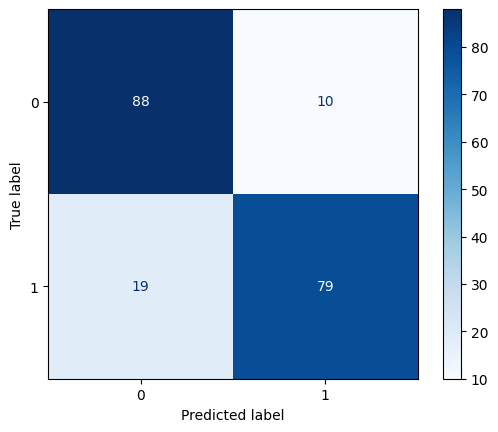

In [155]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score
import matplotlib.pyplot as plt

y_true = y_test
y_pred = mlp.predict(X_test_scaled)
cm = confusion_matrix(y_true, y_pred)

precision = precision_score(y_true, y_pred, average=None)
for label, prec in zip(["Parejas", "Vuelveporfa"], precision):
    print(f"Precision para {label}: {prec:.2f}")
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()